<a href="https://colab.research.google.com/github/leesujin1209/BlockChain/blob/main/10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##5.1 이미지 분석 기초(과일 분류)

In [ ]:
!wget https://bit.ly/fruits_300_data  -o fruits_300.npy
!ls-al

#다운받는 명령어였으므로 필요x

/bin/bash: line 1: ls-al: command not found


(300, 100, 100)


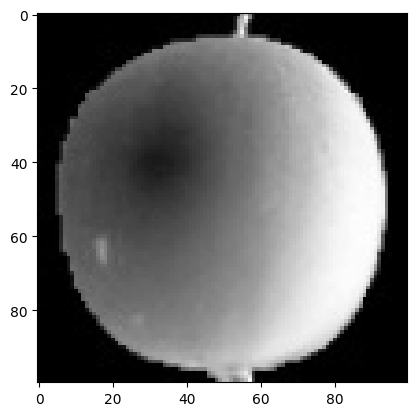

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


In [ ]:
import numpy as np
fruits = np.load('fruits_300_data')
print(fruits.shape)

import matplotlib.pyplot as plt
plt.imshow(fruits[0], cmap='gray')         # 0, 100, 200 올려보기
plt.show()
print(fruits[0, 0, :])                       # 0부터 100 생략

검은색은 0, 흰색은 255

이미지가 0에 가까우면 데이터 분석 어려움

원래 사진은 흰색 바탕에 검은색 사과
-> 반전 데이터로 바탕이 어둡고 사과가 밝아짐



fruits[0] 안의 숫자

*   처음 처음100개[0:99]는 사과
*   그 다음 100개[100:199]는 파인애플
*   마지막 100개[200:299]는 바나나




In [ ]:
apple = fruits[0:100].reshape(-1, 100*100)               # 사과 100개에 대해
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
print(apple.shape)
print(apple.mean(axis = 1))                              # axis = 0이면 모든 사과의 1번열의 픽셀 평균

(100, 10000)
[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


apple.mean(axis = 1)을 하면:

* axis=1은 행(row)을 기준으로 열(column) 방향으로 연산

* 즉, 각 행의 평균을 계산

apple.mean(axis = 0)을 하면:

* axis = 0은 열(column)을 기준으로 행(row) 방향으로 연산
* 즉, 각 열의 평균을 계산



행(row): 가로줄

열(column): 세로줄

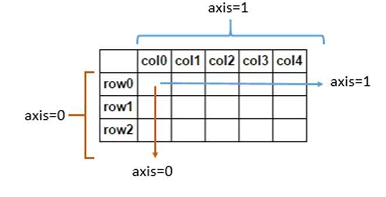

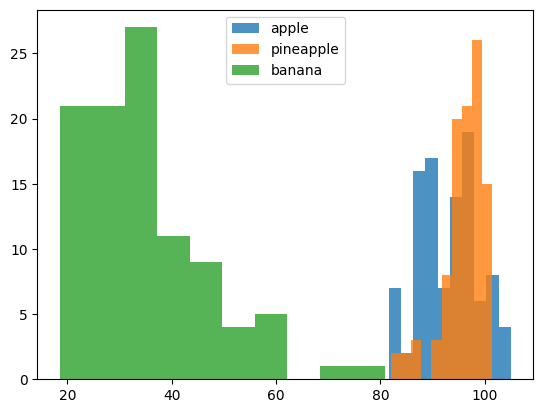

[1.01 1.01 1.01 ... 1.   1.   1.  ]


In [ ]:
plt.hist(apple.mean(axis=1), alpha=0.8)              # 사과 1개의 픽셀 100*100 평균

plt.hist(pineapple.mean(axis=1), alpha=0.8)
plt.hist(banana.mean(axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()
print(apple.mean(axis = 0))

바나나의 평균이 낮은이유: 사진에 바나나 적음

사과와 파인애플의 평균이 비슷한 이유: 둘이 그림 크기가 비슷함

과일별 픽셀의 평균 값으로 구별할 때에 사과와 파인애플은 비슷해 분류가 어렵지만 바나나는 평균이 낮기때문에 구별이 가능함

axios = 0을 구해보면?  [1.01 1.01 1.01 ... 1.   1.   1.  ]

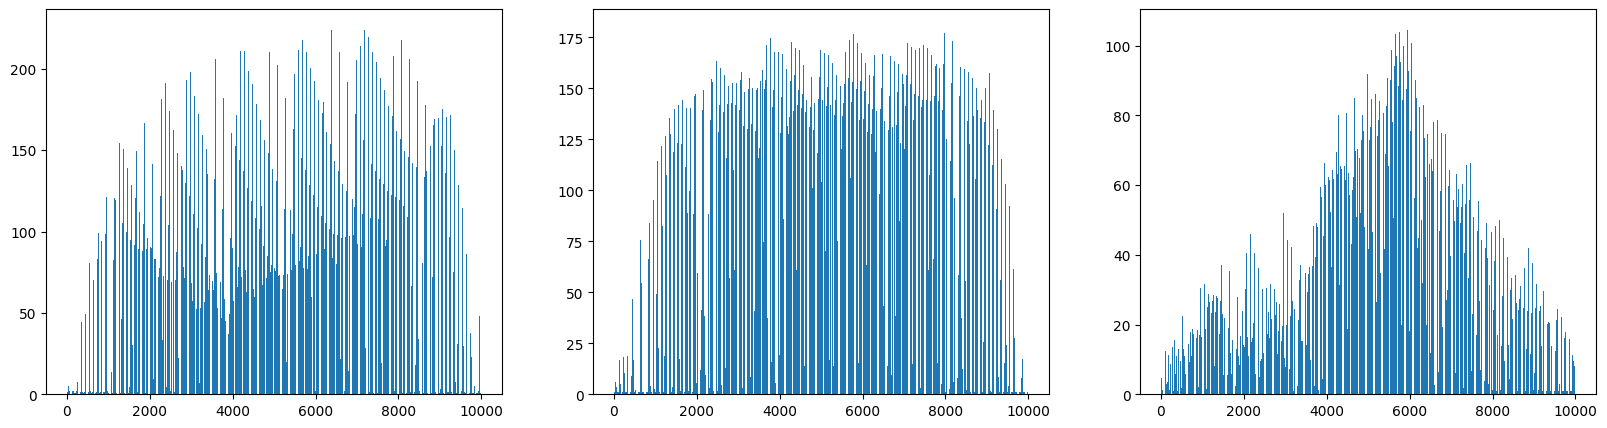

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()

In [ ]:
apple_mean = apple.mean(axis=0).reshape(100,100)                # 사과들의 픽셀별 평균으로 대표 사과 추출 (100*100개의 사과 중 픽셀 당 평균)
pineapple_mean = pineapple.mean(axis=0).reshape(100,100)
banana_mean = banana.mean(axis=0).reshape(100,100)
abs_diff = np.abs(fruits- apple_mean)                           # abs_diff는 300개의 샘플에서 픽셀별로 사과 평균값과의 편차를 구한
abs_mean = np.mean(abs_diff, axis=(1,2))                        # abs_mean은 abs_diff의 평균, 이 값이 적은 것 100개 => 사과
print(abs_diff.shape)
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)[0:100]                       # argsort는 값을 오름차순으로 정렬, 그 중 적은 값(0~99) 100개의 인덱스
print(apple_index)                                              # 인덱스가 100 이하이므로 모두 사과

(300, 100, 100)
(300,)
[33 48 70 57 87 12 78 59  1 74 86 38 50 92 69 27 68 30 66 24 76 98 15 84
 47 90  3 94 53 23 14 71 32  7 73 36 55 77 21 10 17 39 99 95 11 35 65  6
 61 22 56 89  2 13 80  0 97  4 58 34 40 43 75 82 54 16 31 49 93 37 63 64
 41 28 67 25 96  8 83 46 19 79 72  5 85 29 20 60 81  9 45 51 88 62 91 26
 52 18 44 42]


사과 평균 이미지와 가장 유사한 100개의 이미지를 선택하는 방식.


간단한 거리 기반 분류로, 사과의 특징을 평균으로 잡고 그와 가까운 이미지를 사과로 추정하는 방식

---



1. 평균 이미지 계산
- 각각의 과일(사과, 파인애플, 바나나)에 대해 픽셀별 평균 이미지를 계산
- apple은 (100, 10000) 형태일 것으로 추정, reshape(100,100)을 통해 2D 이미지로 복원

2. 사과 평균과의 절대 차이 계산


```
 (abs_diff = np.abs(fruits - apple_mean))
```

- 각 샘플과 apple_mean 간의 픽셀별 절대 차이를 계산

3. 차이의 평균 계산

```
abs_mean = np.mean(abs_diff, axis=(1,2))
```
- 각 이미지에 대해 전체 픽셀의 평균 차이를 계산 → (300,) 형태의 벡터.
- 값이 작을수록 사과 평균과 유사하다는 의미.

4. 사과로 추정되는 이미지 인덱스 추출

```
apple_index = np.argsort(abs_mean)[0:100]
```
- abs_mean을 오름차순 정렬하여 가장 작은 값 100개 선택 → 사과일 가능성이 높은 이미지 인덱스.






